In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew
from scipy.stats import kurtosis
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('bank-full.csv',sep = ';')
train.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [3]:
names = pd.read_csv('bank-names.txt',delimiter = "\t")
names[27:].T

27  \
Citation Request:     1 - age (numeric)   

                                                                  28  \
Citation Request:     2 - job : type of job (categorical: "admin....   

                                                                  29  \
Citation Request:     3 - marital : marital status (categorical: ...   

                                                                  30  \
Citation Request:     4 - education (categorical: "basic.4y","bas...   

                                                                  31  \
Citation Request:     5 - default: has credit in default? (catego...   

                                                                  32  \
Citation Request:     6 - housing: has housing loan? (categorical...   

                                                                  33  \
Citation Request:     7 - loan: has personal loan? (categorical: ...   

                                                                  34  \
Citation Request:     # related with the last contact of the curr...   

                                                                  35  \
Citation Request:     8 - contact: contact communication type (ca...   

                                                                  36  ...  \
Citation Request:     9 - month: last contact month of year (cate...  ...   

                                                                  43  \
Citation Request:    15 - poutcome: outcome of the previous marke...   

                                                            44  \
Citation Request:     # social and economic context attributes   

                                                                  45  \
Citation Request:    16 - emp.var.rate: employment variation rate...   

                                                                  46  \
Citation Request:    17 - cons.price.idx: consumer price index - ...   

                                                                  47  \
Citation Request:    18 - cons.conf.idx: consumer confidence inde...   

                                                                  48  \
Citation Request:    19 - euribor3m: euribor 3 month rate - daily...   

                                                                  49  \
Citation Request:    20 - nr.employed: number of employees - quar...   

                                                    50  \
Citation Request:    Output variable (desired target):   

                                                                  51  \
Citation Request:    21 - y - has the client subscribed a term de...   

                                                                  52  
Citation Request:  8. Missing Attribute Values: There are several...  

[1 rows x 26 columns]

In [4]:
train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
new_cols = {'job':'job_type','marital':'marital_status','education':'education_level','default':'default_credit',
           'housing':'housing_loan','loan':'personal_loan','contact':'contact_type','month':'last_Cmonth',
           'day_of_week':'last_Cday','contact_duration':'last_Cduration','campaign':'no_of_contacts',
            'pdays':'passed_days','previous':'previous_contacts','poutcome':'previous_outcome',
            'emp.var.rate':'emp_var_rate','cons.price.idx':'cons_price_idx','cons.conf.idx':'cons_conf_idx',
           'nr.employed':'no_of_employees'}

In [6]:
train.rename(columns = new_cols,inplace = True)
train.head()

age   job_type marital_status education_level default_credit housing_loan  \
0   56  housemaid        married        basic.4y             no           no   
1   57   services        married     high.school        unknown           no   
2   37   services        married     high.school             no          yes   
3   40     admin.        married        basic.6y             no           no   
4   56   services        married     high.school             no           no   

  personal_loan contact_type last_Cmonth last_Cday  ...  no_of_contacts  \
0            no    telephone         may       mon  ...               1   
1            no    telephone         may       mon  ...               1   
2            no    telephone         may       mon  ...               1   
3            no    telephone         may       mon  ...               1   
4           yes    telephone         may       mon  ...               1   

   passed_days  previous_contacts  previous_outcome emp_var_rate  \
0          999                  0       nonexistent          1.1   
1          999                  0       nonexistent          1.1   
2          999                  0       nonexistent          1.1   
3          999                  0       nonexistent          1.1   
4          999                  0       nonexistent          1.1   

   cons_price_idx  cons_conf_idx  euribor3m  no_of_employees   y  
0          93.994          -36.4      4.857           5191.0  no  
1          93.994          -36.4      4.857           5191.0  no  
2          93.994          -36.4      4.857           5191.0  no  
3          93.994          -36.4      4.857           5191.0  no  
4          93.994          -36.4      4.857           5191.0  no  

[5 rows x 21 columns]

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                41188 non-null  int64  
 1   job_type           41188 non-null  object 
 2   marital_status     41188 non-null  object 
 3   education_level    41188 non-null  object 
 4   default_credit     41188 non-null  object 
 5   housing_loan       41188 non-null  object 
 6   personal_loan      41188 non-null  object 
 7   contact_type       41188 non-null  object 
 8   last_Cmonth        41188 non-null  object 
 9   last_Cday          41188 non-null  object 
 10  duration           41188 non-null  int64  
 11  no_of_contacts     41188 non-null  int64  
 12  passed_days        41188 non-null  int64  
 13  previous_contacts  41188 non-null  int64  
 14  previous_outcome   41188 non-null  object 
 15  emp_var_rate       41188 non-null  float64
 16  cons_price_idx     411

In [8]:
{column: len(train[column].unique()) for column in train.select_dtypes('object').columns}

{'job_type': 12,
 'marital_status': 4,
 'education_level': 8,
 'default_credit': 3,
 'housing_loan': 3,
 'personal_loan': 3,
 'contact_type': 2,
 'last_Cmonth': 10,
 'last_Cday': 5,
 'previous_outcome': 3,
 'y': 2}

In [9]:
{column: train[column].unique() for column in train.select_dtypes('object').columns}

{'job_type': array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
        'retired', 'management', 'unemployed', 'self-employed', 'unknown',
        'entrepreneur', 'student'], dtype=object),
 'marital_status': array(['married', 'single', 'divorced', 'unknown'], dtype=object),
 'education_level': array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
        'professional.course', 'unknown', 'university.degree',
        'illiterate'], dtype=object),
 'default_credit': array(['no', 'unknown', 'yes'], dtype=object),
 'housing_loan': array(['no', 'yes', 'unknown'], dtype=object),
 'personal_loan': array(['no', 'yes', 'unknown'], dtype=object),
 'contact_type': array(['telephone', 'cellular'], dtype=object),
 'last_Cmonth': array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
        'sep'], dtype=object),
 'last_Cday': array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object),
 'previous_outcome': array(['nonexistent', 'failure', 'success'], dtype=obje

In [10]:
train['passed_days'].replace({999:0},inplace = True)

In [11]:
train.describe()

age      duration  no_of_contacts   passed_days  \
count  41188.00000  41188.000000    41188.000000  41188.000000   
mean      40.02406    258.285010        2.567593      0.221229   
std       10.42125    259.279249        2.770014      1.348874   
min       17.00000      0.000000        1.000000      0.000000   
25%       32.00000    102.000000        1.000000      0.000000   
50%       38.00000    180.000000        2.000000      0.000000   
75%       47.00000    319.000000        3.000000      0.000000   
max       98.00000   4918.000000       56.000000     27.000000   

       previous_contacts  emp_var_rate  cons_price_idx  cons_conf_idx  \
count       41188.000000  41188.000000    41188.000000   41188.000000   
mean            0.172963      0.081886       93.575664     -40.502600   
std             0.494901      1.570960        0.578840       4.628198   
min             0.000000     -3.400000       92.201000     -50.800000   
25%             0.000000     -1.800000       93.075000     -42.700000   
50%             0.000000      1.100000       93.749000     -41.800000   
75%             0.000000      1.400000       93.994000     -36.400000   
max             7.000000      1.400000       94.767000     -26.900000   

          euribor3m  no_of_employees  
count  41188.000000     41188.000000  
mean       3.621291      5167.035911  
std        1.734447        72.251528  
min        0.634000      4963.600000  
25%        1.344000      5099.100000  
50%        4.857000      5191.000000  
75%        4.961000      5228.100000  
max        5.045000      5228.100000

<AxesSubplot:xlabel='y', ylabel='count'>

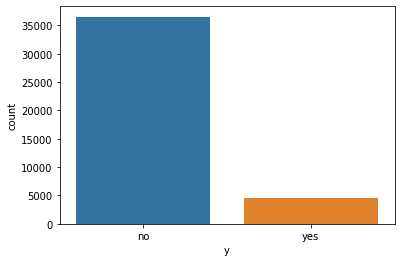

In [12]:
sns.countplot(x = train['y'])

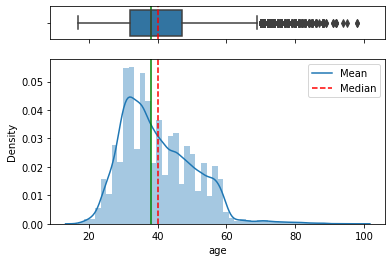

Skewness : 0.7846682380932289
Kurtosis : 0.7910698035273853
Lower quartile  32.0
Upper quartile  47.0
Inter quartile range  15.0
lower_whisker  9.5
upper_whisker 69.5


(1, 469)

In [13]:
age = train['age']



f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (1, 5)})
mean=np.array(age).mean()
median=np.median(age)

sns.boxplot(age, ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.distplot(age, ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})
ax_box.set(xlabel='')
plt.show()


print('Skewness :',skew(age))
print('Kurtosis :',kurtosis(age))

q1 = train['age'].quantile(0.25)
q3 = train['age'].quantile(0.75)
iqr = q3-q1
print('Lower quartile ', q1)
print('Upper quartile ', q3)
print('Inter quartile range ', iqr)

lower_whisker = q1 - (1.5 * iqr)
upper_whisker = q3 + (1.5 * iqr)
print('lower_whisker ', lower_whisker)
print('upper_whisker', upper_whisker)

np.array((np.where((train['age']<lower_whisker) | (train['age']>upper_whisker)))).shape


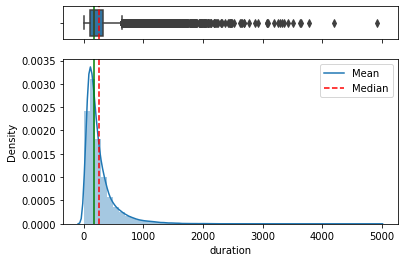

Skewness : 3.2630224157610432
Kurtosis : 20.245334438614844
Lower quartile  102.0
Upper quartile  319.0
Inter quartile range  217.0
lower_whisker  -223.5
upper_whisker 644.5


(1, 2963)

In [14]:
dur = train['duration']



f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (1, 5)})
mean=np.array(dur).mean()
median=np.median(dur)

sns.boxplot(dur, ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.distplot(dur, ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})
ax_box.set(xlabel='')
plt.show()


print('Skewness :',skew(dur))
print('Kurtosis :',kurtosis(dur))

q1 = train['duration'].quantile(0.25)
q3 = train['duration'].quantile(0.75)
iqr = q3-q1
print('Lower quartile ', q1)
print('Upper quartile ', q3)
print('Inter quartile range ', iqr)

lower_whisker = q1 - (1.5 * iqr)
upper_whisker = q3 + (1.5 * iqr)
print('lower_whisker ', lower_whisker)
print('upper_whisker', upper_whisker)

np.array((np.where((dur<lower_whisker) | (dur>upper_whisker)))).shape


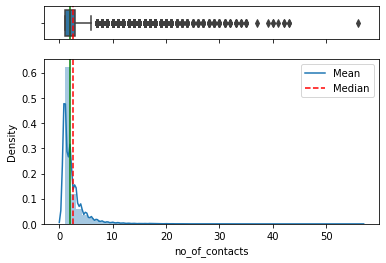

Skewness : 4.762333252560971
Kurtosis : 36.97516047878921
Lower quartile  1.0
Upper quartile  3.0
Inter quartile range  2.0
lower_whisker  -2.0
upper_whisker 6.0


(1, 2406)

In [15]:
con = train['no_of_contacts']



f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (1, 5)})
mean=np.array(con).mean()
median=np.median(con)

sns.boxplot(con, ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.distplot(con, ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})
ax_box.set(xlabel='')
plt.show()

print('Skewness :',skew(con))
print('Kurtosis :',kurtosis(con))

q1 = con.quantile(0.25)
q3 = con.quantile(0.75)
iqr = q3-q1
print('Lower quartile ', q1)
print('Upper quartile ', q3)
print('Inter quartile range ', iqr)

lower_whisker = q1 - (1.5 * iqr)
upper_whisker = q3 + (1.5 * iqr)
print('lower_whisker ', lower_whisker)
print('upper_whisker', upper_whisker)

np.array((np.where((con<lower_whisker) | (con>upper_whisker)))).shape



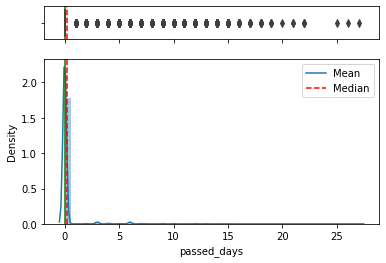

Skewness : 7.939248037717915
Kurtosis : 76.39261699609459
Lower quartile  0.0
Upper quartile  0.0
Inter quartile range  0.0
lower_whisker  0.0
upper_whisker 0.0


(1, 1500)

In [16]:
pdays = train['passed_days']



f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (1, 5)})
mean=np.array(pdays).mean()
median=np.median(pdays)

sns.boxplot(pdays, ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.distplot(pdays, ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})
ax_box.set(xlabel='')
plt.show()

print('Skewness :',skew(pdays))
print('Kurtosis :',kurtosis(pdays))

q1 = pdays.quantile(0.25)
q3 = pdays.quantile(0.75)
iqr = q3-q1
print('Lower quartile ', q1)
print('Upper quartile ', q3)
print('Inter quartile range ', iqr)

lower_whisker = q1 - (1.5 * iqr)
upper_whisker = q3 + (1.5 * iqr)
print('lower_whisker ', lower_whisker)
print('upper_whisker', upper_whisker)

np.array((np.where((pdays<lower_whisker) | (pdays>upper_whisker)))).shape

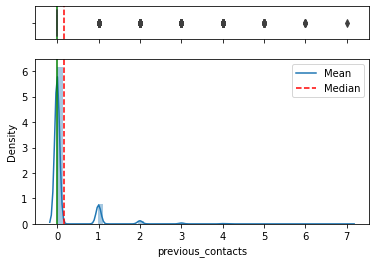

Skewness : 3.8319026847007014
Kurtosis : 20.106229526902816
Lower quartile  0.0
Upper quartile  0.0
Inter quartile range  0.0
lower_whisker  0.0
upper_whisker 0.0


(1, 5625)

In [17]:
pcon = train['previous_contacts']



f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (1, 5)})
mean=np.array(pcon).mean()
median=np.median(pcon)

sns.boxplot(pcon, ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.distplot(pcon, ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})
ax_box.set(xlabel='')
plt.show()

print('Skewness :',skew(pcon))
print('Kurtosis :',kurtosis(pcon))

q1 = pcon.quantile(0.25)
q3 = pcon.quantile(0.75)
iqr = q3-q1
print('Lower quartile ', q1)
print('Upper quartile ', q3)
print('Inter quartile range ', iqr)

lower_whisker = q1 - (1.5 * iqr)
upper_whisker = q3 + (1.5 * iqr)
print('lower_whisker ', lower_whisker)
print('upper_whisker', upper_whisker)

np.array((np.where((pcon<lower_whisker) | (pcon>upper_whisker)))).shape

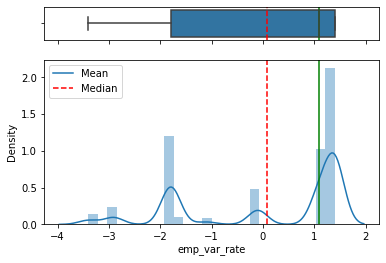

Skewness : -0.7240691785977529
Kurtosis : -1.0626482012872505
Lower quartile  -1.8
Upper quartile  1.4
Inter quartile range  3.2
lower_whisker  -6.6000000000000005
upper_whisker 6.200000000000001


(1, 0)

In [18]:
emp = train['emp_var_rate']



f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (1, 5)})
mean=np.array(emp).mean()
median=np.median(emp)

sns.boxplot(emp, ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.distplot(emp, ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})
ax_box.set(xlabel='')
plt.show()

print('Skewness :',skew(emp))
print('Kurtosis :',kurtosis(emp))

q1 = emp.quantile(0.25)
q3 = emp.quantile(0.75)
iqr = q3-q1
print('Lower quartile ', q1)
print('Upper quartile ', q3)
print('Inter quartile range ', iqr)

lower_whisker = q1 - (1.5 * iqr)
upper_whisker = q3 + (1.5 * iqr)
print('lower_whisker ', lower_whisker)
print('upper_whisker', upper_whisker)

np.array((np.where((emp<lower_whisker) | (emp>upper_whisker)))).shape

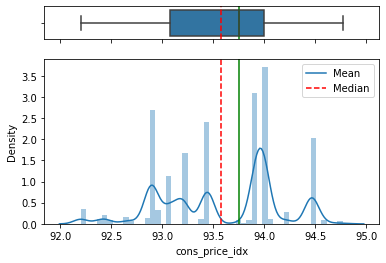

Skewness : -0.23087924271991117
Kurtosis : -0.8298535163032219
Lower quartile  93.075
Upper quartile  93.994
Inter quartile range  0.9189999999999969
lower_whisker  91.69650000000001
upper_whisker 95.3725


(1, 0)

In [19]:
cons = train['cons_price_idx']



f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (1, 5)})
mean=np.array(cons).mean()
median=np.median(cons)

sns.boxplot(cons, ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.distplot(cons, ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})
ax_box.set(xlabel='')
plt.show()

print('Skewness :',skew(cons))
print('Kurtosis :',kurtosis(cons))

q1 = cons.quantile(0.25)
q3 = cons.quantile(0.75)
iqr = q3-q1
print('Lower quartile ', q1)
print('Upper quartile ', q3)
print('Inter quartile range ', iqr)

lower_whisker = q1 - (1.5 * iqr)
upper_whisker = q3 + (1.5 * iqr)
print('lower_whisker ', lower_whisker)
print('upper_whisker', upper_whisker)

np.array((np.where((cons<lower_whisker) | (cons>upper_whisker)))).shape

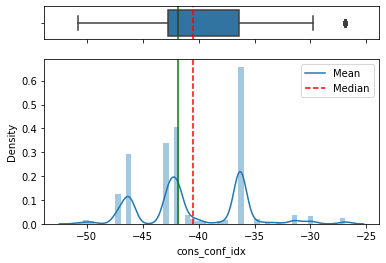

Skewness : 0.3031688173189229
Kurtosis : -0.35866045494457843
Lower quartile  -42.7
upper quartile  -36.4
Inter quartile range  6.300000000000004
lower_whisker  -52.150000000000006
upper_whisker -26.949999999999992


(1, 447)

In [20]:
conf = train['cons_conf_idx']



f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (1, 5)})
mean=np.array(conf).mean()
median=np.median(conf)

sns.boxplot(conf, ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.distplot(conf, ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})
ax_box.set(xlabel='')
plt.show()

print('Skewness :',skew(conf))
print('Kurtosis :',kurtosis(conf))

q1 = conf.quantile(0.25)
q3 = conf.quantile(0.75)
iqr = q3-q1
print('Lower quartile ', q1)
print('upper quartile ', q3)
print('Inter quartile range ', iqr)

lower_whisker = q1 - (1.5 * iqr)
upper_whisker = q3 + (1.5 * iqr)
print('lower_whisker ', lower_whisker)
print('upper_whisker', upper_whisker)

np.array((np.where((conf<lower_whisker) | (conf>upper_whisker)))).shape

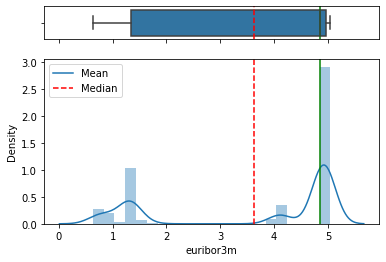

Skewness : -0.7091621286441162
Kurtosis : -1.4067775199378407
Lower quartile  1.344
Upper quartile  4.961
Inter quartile range  3.617
lower_whisker  -4.081499999999999
upper_whisker 10.3865


(1, 0)

In [21]:
eur = train['euribor3m']



f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (1, 5)})
mean=np.array(eur).mean()
median=np.median(eur)

sns.boxplot(eur, ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.distplot(eur, ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})
ax_box.set(xlabel='')
plt.show()

print('Skewness :',skew(eur))
print('Kurtosis :',kurtosis(eur))

q1 = eur.quantile(0.25)
q3 = eur.quantile(0.75)
iqr = q3-q1
print('Lower quartile ', q1)
print('Upper quartile ', q3)
print('Inter quartile range ', iqr)

lower_whisker = q1 - (1.5 * iqr)
upper_whisker = q3 + (1.5 * iqr)
print('lower_whisker ', lower_whisker)
print('upper_whisker', upper_whisker)

np.array((np.where((eur<lower_whisker) | (eur>upper_whisker)))).shape

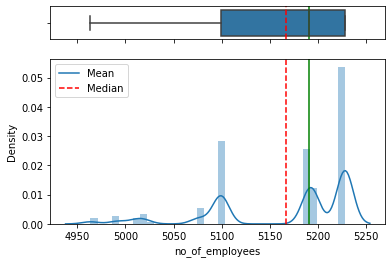

Skewness : -1.0442243763652297
Kurtosis : -0.003905589182342073
Lower quartile  5099.1
Upper quartile  5228.1
Inter quartile range  129.0
lower_whisker  4905.6
upper_whisker 5421.6


(1, 0)

In [22]:
eur2 = train['no_of_employees']


f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (1, 5)})
mean=np.array(eur2).mean()
median=np.median(eur2)

sns.boxplot(eur2, ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.distplot(eur2, ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})
ax_box.set(xlabel='')
plt.show()

print('Skewness :',skew(eur2))
print('Kurtosis :',kurtosis(eur2))

q1 = eur2.quantile(0.25)
q3 = eur2.quantile(0.75)
iqr = q3-q1
print('Lower quartile ', q1)
print('Upper quartile ', q3)
print('Inter quartile range ', iqr)

lower_whisker = q1 - (1.5 * iqr)
upper_whisker = q3 + (1.5 * iqr)
print('lower_whisker ', lower_whisker)
print('upper_whisker', upper_whisker)

np.array((np.where((eur2<lower_whisker) | (eur2>upper_whisker)))).shape




In [23]:
#replacing unknown values with np.nan
train.replace(to_replace='unknown',value = np.nan,inplace = True)

In [24]:
from pandas_profiling import ProfileReport

In [25]:
profile = ProfileReport(train, title="Pandas Profiling Report", explorative=True)

In [26]:
profile

Summarize dataset:   0%|          | 0/34 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [27]:
profile.to_file("bank_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [28]:
#Dropping duplicates
train.drop_duplicates(inplace = True)
train.shape

(41176, 21)

In [29]:
#Filling the missing categorical values with the mode.
def fill_null(df):
    for col in df.select_dtypes('object').columns:
        mode = df[col].mode()[0]
        df[col].fillna(mode,inplace = True)
        
    return df.isna().sum()
    
fill_null(train)
        

age                  0
job_type             0
marital_status       0
education_level      0
default_credit       0
housing_loan         0
personal_loan        0
contact_type         0
last_Cmonth          0
last_Cday            0
duration             0
no_of_contacts       0
passed_days          0
previous_contacts    0
previous_outcome     0
emp_var_rate         0
cons_price_idx       0
cons_conf_idx        0
euribor3m            0
no_of_employees      0
y                    0
dtype: int64

In [30]:
#Using median to replace outliers
for i in ['age','duration','no_of_contacts','passed_days','previous_contacts']:
     
    q1 = train[i].quantile(0.25)
    q3 = train[i].quantile(0.75)
    iqr = q3-q1
    print(i)
    print('-------------')
    print('Lower quartile ', q1)
    print('Upper quartile ', q3)
    print('Inter quartile range ', iqr)

    lower_whisker = q1 - (1.5 * iqr)
    upper_whisker = q3 + (1.5 * iqr)
    print('lower_whisker ', lower_whisker)
    print('upper_whisker', upper_whisker)
    
    train[i] = np.where((train[i] < lower_whisker) | (train[i]>upper_whisker),train[i].median(),train[i])

    print(np.array((np.where((train[i]<lower_whisker) | (train[i]>upper_whisker)))).shape)
    print('skew',skew(train[i]))


age
-------------
Lower quartile  32.0
Upper quartile  47.0
Inter quartile range  15.0
lower_whisker  9.5
upper_whisker 69.5
(1, 0)
skew 0.44388125503936027
duration
-------------
Lower quartile  102.0
Upper quartile  319.0
Inter quartile range  217.0
lower_whisker  -223.5
upper_whisker 644.5
(1, 0)
skew 1.1005655039402902
no_of_contacts
-------------
Lower quartile  1.0
Upper quartile  3.0
Inter quartile range  2.0
lower_whisker  -2.0
upper_whisker 6.0
(1, 0)
skew 1.3521709585431516
passed_days
-------------
Lower quartile  0.0
Upper quartile  0.0
Inter quartile range  0.0
lower_whisker  0.0
upper_whisker 0.0
(1, 0)
skew 0.0
previous_contacts
-------------
Lower quartile  0.0
Upper quartile  0.0
Inter quartile range  0.0
lower_whisker  0.0
upper_whisker 0.0
(1, 0)
skew 0.0


In [31]:
#Removing previous_contacts and passed_days columns due to high percentage of zeros
train.drop(['passed_days','previous_contacts'],axis = 1,inplace = True)
train.shape

(41176, 19)

<AxesSubplot:>

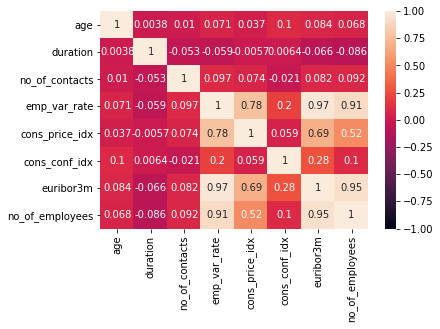

In [32]:
#Checking for correlation among numerical variables
sns.heatmap(train.corr(),annot = True,vmin = -1,vmax=1)

# PRE-PROCESSING

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [34]:
Target = train['y']
ordinal_features = ['job_type','education_level']
nominal_features = ['marital_status','default_credit','housing_loan','personal_loan','contact_type','last_Cmonth','last_Cday','previous_outcome']
numeric_features = ['age','duration','no_of_contacts','emp_var_rate','cons_price_idx','cons_conf_idx','euribor3m',
                   'no_of_employees']

In [35]:
X = train.drop(columns = 'y')
y = Target
X_train,x_test,Y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 10)


In [36]:
ct = ColumnTransformer([('sc',StandardScaler(),numeric_features),
                       ('ohe',OneHotEncoder(sparse = False,drop = 'first',handle_unknown = 'error'),nominal_features),
                       ('oe',OrdinalEncoder(),ordinal_features)
                       ],remainder = 'passthrough')

In [37]:
X_ct = ct.fit_transform(X_train)

In [38]:
x_test_ct = ct.transform(x_test)

In [39]:
ct.transformers_

[('sc',
  StandardScaler(),
  ['age',
   'duration',
   'no_of_contacts',
   'emp_var_rate',
   'cons_price_idx',
   'cons_conf_idx',
   'euribor3m',
   'no_of_employees']),
 ('ohe',
  OneHotEncoder(drop='first', sparse=False),
  ['marital_status',
   'default_credit',
   'housing_loan',
   'personal_loan',
   'contact_type',
   'last_Cmonth',
   'last_Cday',
   'previous_outcome']),
 ('oe', OrdinalEncoder(), ['job_type', 'education_level'])]

In [40]:
le = LabelEncoder()

In [41]:
Y_train_le = le.fit_transform(Y_train)
Y_train_le

array([0, 0, 0, ..., 1, 1, 0])

In [42]:
y_test_le = le.transform(y_test)

<AxesSubplot:ylabel='count'>

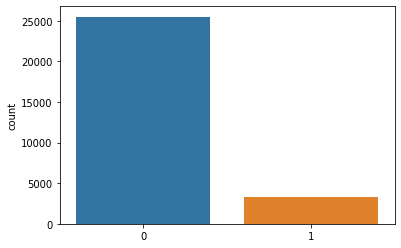

In [43]:
sns.countplot(x = Y_train_le)

# Machine Learning

<AxesSubplot:ylabel='count'>

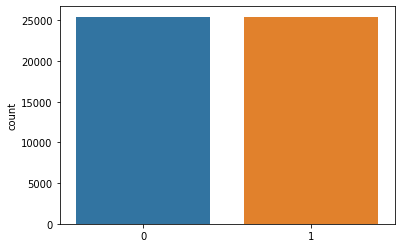

In [44]:
from imblearn.combine import SMOTETomek
sm = SMOTETomek(random_state = 33)
X_res,Y_res = sm.fit_resample(X_ct,Y_train_le)
sns.countplot(x = Y_res)

<AxesSubplot:ylabel='count'>

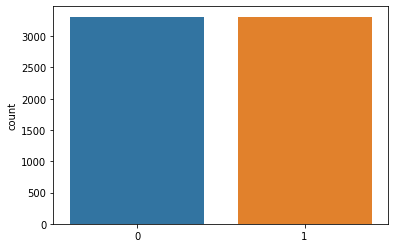

In [45]:
from imblearn.under_sampling import RandomUnderSampler
ru = RandomUnderSampler(sampling_strategy= 'majority')
X_res_ru,Y_res_ru = ru.fit_resample(X_ct,Y_train_le)
sns.countplot(x = Y_res_ru)

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [47]:
rfc = RandomForestClassifier()
rfc.fit(X_res_ru,Y_res_ru)

RandomForestClassifier()

In [48]:
y_pred = rfc.predict(x_test_ct)


In [49]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
accuracy_score(y_test_le, y_pred)

0.8503197603820934

In [50]:
pd.DataFrame(confusion_matrix(y_test_le, y_pred))

0     1
0  9316  1709
1   140  1188

In [51]:
recall_score(y_test_le, y_pred)

0.8945783132530121

In [52]:
precision_score(y_test_le, y_pred)


0.4100793924749741

In [53]:
from sklearn.ensemble import AdaBoostClassifier

In [54]:
ABC = AdaBoostClassifier()
ABC.fit(X_res_ru,Y_res_ru)


AdaBoostClassifier()

In [55]:
y_pred1 = ABC.predict(x_test_ct)


In [56]:
pd.DataFrame(confusion_matrix(y_test_le, y_pred1))

0     1
0  9390  1635
1   161  1167

In [57]:
accuracy_score(y_test_le, y_pred1)

0.8546102161418279

In [58]:
pd.DataFrame(confusion_matrix(y_test_le, y_pred1))

0     1
0  9390  1635
1   161  1167

In [59]:
precision_score(y_test_le, y_pred1)

0.4164882226980728

In [60]:
recall_score(y_test_le, y_pred1)

0.8787650602409639

In [61]:
from sklearn.metrics import classification_report

In [62]:
print(classification_report(y_test_le, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91     11025
           1       0.41      0.89      0.56      1328

    accuracy                           0.85     12353
   macro avg       0.70      0.87      0.74     12353
weighted avg       0.92      0.85      0.87     12353



In [63]:
print(classification_report(y_test_le, y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91     11025
           1       0.42      0.88      0.57      1328

    accuracy                           0.85     12353
   macro avg       0.70      0.87      0.74     12353
weighted avg       0.92      0.85      0.88     12353

